In [57]:
import openbabel as ob
import pybel

from io import StringIO
from ase.constraints import FixInternals
from ase.optimize import BFGS
from ase.io.xyz import read_xyz
from ase import Atoms
import networkx as nx

Make the molecule object:

In [25]:
test_smiles = "O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+](=O)[O-])c([N+](=O)[O-])c1"

obConversion = ob.OBConversion()
obConversion.SetInAndOutFormats("smi", "mdl")

mol_ob = ob.OBMol()
obConversion.ReadString(mol_ob, test_smiles)

True

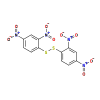

In [24]:
mol_pybel = pybel.Molecule(mol_ob)
mol_pybel

In [16]:
mol_pybel.draw()

ImportError: Tkinter or Python Imaging Library not found, but is required for image display. See installation instructions for more information.

In [50]:
pybel.outformats

{'acesin': 'ACES input format',
 'adf': 'ADF cartesian input format',
 'alc': 'Alchemy format',
 'ascii': 'ASCII format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'cac': 'CAChe MolStruct format',
 'caccrt': 'Cacao Cartesian format',
 'cache': 'CAChe MolStruct format',
 'cacint': 'Cacao Internal format',
 'can': 'Canonical SMILES format',
 'cdjson': 'ChemDoodle JSON',
 'cdxml': 'ChemDraw CDXML format',
 'cht': 'Chemtool format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'com': 'Gaussian 98/03 Input',
 'confabreport': 'Confab report format',
 'CONFIG': 'DL-POLY CONFIG',
 'CONTCAR': 'VASP format',
 'CONTFF': 'MDFF format',
 'copy': 'Copy raw text',
 'crk2d': 'Chemical Resource Kit diagram(2D)',
 'crk3d': 'Chemical Resource Kit 3D format',
 'csr': 'Accelrys/MSI Quanta CSR

We want the `'xyz': 'XYZ cartesian coordinates format'` option:

In [53]:
mol_pybel.make3D()
coord = mol_pybel.write(format='xyz')
print(coord)

32

O          1.11128       -0.07438       -0.02742
N          2.34887       -0.04174       -0.02193
O          3.05072        0.85550        0.45753
C          3.03208       -1.14366       -0.68006
C          3.88066       -0.86913       -1.74576
C          4.37169       -1.92962       -2.50996
C          3.89480       -3.24570       -2.33417
S          3.95245       -4.31239       -3.80597
S          5.66472       -3.84835       -4.88239
C          5.98593       -5.33353       -5.85052
C          6.15027       -5.11946       -7.24181
C          6.14854       -6.18378       -8.15692
C          6.09923       -7.49339       -7.68127
N          5.97702       -8.61877       -8.62158
O          5.89246       -8.35109       -9.82926
O          5.93951       -9.76025       -8.14773
C          6.12530       -7.73827       -6.30407
C          6.02963       -6.66270       -5.38983
N          5.98358       -7.02622       -3.96247
O          5.67442       -8.18853       -3.68816
O          6.313

Using applied-ai-for-materials/optimal-experimental-design/assignment/confutils.py as a template, convert these coordinates into ASE objects to get them ready for shnet,

In [60]:
# Convert it to ASE
atoms = next(read_xyz(StringIO(mol_pybel.write('xyz')), slice(None)))

# Get the bonding graph
g = nx.Graph()
g.add_nodes_from(range(len(mol_pybel.atoms)))
for bond in ob.OBMolBondIter(mol_pybel.OBMol):
    g.add_edge(bond.GetBeginAtomIdx() - 1, bond.GetEndAtomIdx() - 1, data={"rotor": bond.IsRotor()})

Atoms(symbols='ONOC4S2C4NO2C2NO2CNO2CH6', pbc=False)
The generated graph:


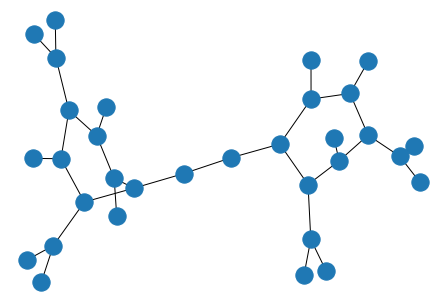

In [87]:
print(atoms)
print('The generated graph:')
nx.draw(g)

Tried working directly with the `openbabel` module, and ran into issues with C++ pointers:  
(The pyble code above is much better)

In [37]:
builder = ob.OBBuilder()
builder.Build(mol_ob)

In [42]:
mol_ob.Has3D()

True

In [41]:
mol_ob.GetCoordinates()

<Swig Object of type 'double *' at 0x7fd0d0f22d20>